# Text classification on news headlines using sklearn

In [1]:
# Use case text-classification
# performing text classification on news headlines and classify
# news into different topics for news website

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [2]:
df = fetch_20newsgroups()
data = df.target_names
print(data)

# defining all the categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
                  'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
                  'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
                  'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space',
                  'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
                  'talk.politics.misc', 'talk.religion.misc']


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# training data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)

# Testing the data for these categories
test = fetch_20newsgroups(subset='test', categories=categories)

# printing the trainning data
print(train.data[5])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [4]:
# creating model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Trainning the model with the train data
model.fit(train.data, train.target)

# creating labels for the test data
labels = model.predict(test.data)

Text(83.4578947368421, 0.5, 'Predicted label')

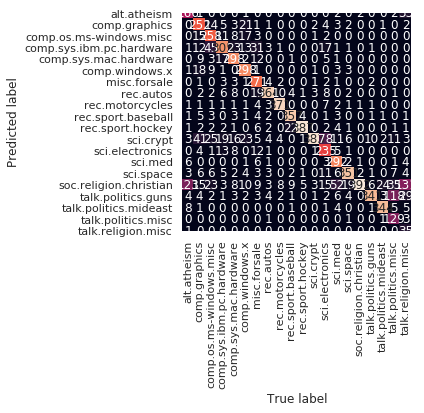

In [5]:
# creating confusion matrix and heat map
cm = confusion_matrix(test.target, labels)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)

# plotting heatmap of confusion matrix
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [8]:
# predicting category on new data on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [9]:
predict_category('Sending load to International Space Station')

'sci.space'

In [10]:
predict_category('Do you have a car?')

'rec.autos'